# Asignación 3. Linear regression and error curve plot


* Se Buscaran determinar el valor de Y para datos nuevos 
    (X 1 ,y 1 ), (X 2 ,y 2 ),...(X n ,y n ) 
* Se intenta estimar V aproximando a la recta o plano

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#LIstamos los datos y verificamos que tengamos la fuente "regLinPoli.csv"
!pwd && ls MaterialyTareas/datos/ -l

/home/itam/machineLearning
total 1272
-rw-r--r-- 1 itam users 754845 Sep 14 16:11 EjercicioROC.csv
-rw-r--r-- 1 itam users     50 Sep  7 17:18 andSVM.csv
-rw-r--r-- 1 itam users  24483 Sep  7 17:18 regLin.csv
-rw-r--r-- 1 itam users 374795 Sep  7 17:18 regLin.xlsx
-rw-r--r-- 1 itam users  24467 Sep  7 17:18 regLin2.csv
-rw-r--r-- 1 itam users  24961 Sep  7 17:18 regLin3.csv
-rw-r--r-- 1 itam users  14299 Sep  7 17:18 regLin4.csv
-rw-r--r-- 1 itam users  66015 Sep  7 17:18 regLinPoli.csv


In [3]:
#Leemos el archivo y presentamos el contenido de las variables.
df_LR = pd.read_csv("MaterialyTareas/datos/regLin.csv")
df_LR.head()

,X,y
0,35.657897,28.074403
1,48.685931,36.674434
2,95.861773,67.903577
3,25.997253,11.931727
4,49.964772,30.286144


In [4]:
# Hacemos e Split de los datos en training/testing datasets
df_LR_X_train, df_LR_X_test, df_LR_Y_train, df_LR_Y_test = train_test_split(df_LR[['X']], df_LR[['y']], test_size=0.33, random_state=42)


In [5]:

# Creamos el objeto regresión Lineal 
regr = linear_model.LinearRegression()



In [6]:
# Entrenamos el Modelo usando el DataSet de Entrenamiento
regr.fit(df_LR_X_train, df_LR_Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:

df_LR_Y_pred = regr.predict(df_LR_X_test)

In [8]:
# The coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)
# Erro cuadratico
print("Mean squared error: %.4f"
      % mean_squared_error(df_LR_Y_test, df_LR_Y_pred))
# Revizamos la varianza: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_LR_Y_test, df_LR_Y_pred))


Coefficients: [[ 0.60381877]]
Intercept: [ 2.55109819]
Mean squared error: 16.5543
Variance score: 0.95


### Sacamos los valores para W0 y W1

In [9]:
W0 = np.linspace(regr.intercept_[0]-1.5,regr.intercept_[0]+1.5,100)

W1 = np.linspace(regr.coef_[0][0]-1,regr.coef_[0][0]+1,100)

In [10]:

Wcoef = regr.coef_[0][0]

Winter= regr.intercept_[0]

### Sacamos el Error y Error cuadratico W0

In [11]:
Werr = [np.mean((i+Wcoef*df_LR_X_train - np.array(df_LR_Y_train))**2) for i in W0]

Wsqr = np.mean((regr.intercept_[0]+Wcoef*df_LR_X_train - np.array(df_LR_Y_train))**2)

### Revisamos el error para W0

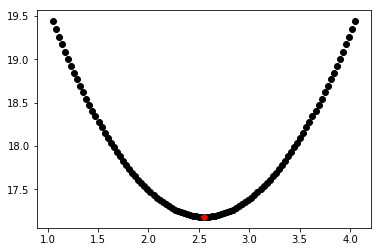

In [12]:
plt.scatter(W0, Werr,  color='black')
plt.plot(regr.intercept_[0], Wsqr, 'p-', color = 'red')
plt.show()

### Sacamos el Error y Error cuadratico W1

In [13]:
Werr = [np.mean((Winter+i*df_LR_X_train - np.array(df_LR_Y_train))**2) for i in W1]

Wsqr = np.mean((regr.intercept_[0]+Wcoef*df_LR_X_train - np.array(df_LR_Y_train))**2)

### Revisamos el error para W1

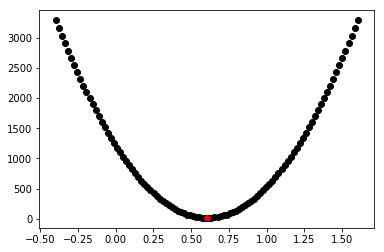

In [14]:
plt.scatter(W1, Werr,  color='black')
plt.plot(Wcoef, Wsqr, 'p-', color = 'red')
plt.show()

### Plot de la Regresión Lineal

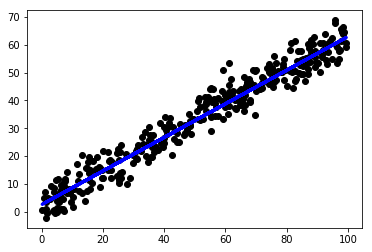

In [15]:

# Plot outputs
plt.scatter(df_LR_X_test, df_LR_Y_test,  color='black')
plt.plot(df_LR_X_test, df_LR_Y_pred, color='blue', linewidth=3)
plt.show()